In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("Titanic-Dataset.csv")

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df.shape

(891, 12)

In [7]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
531,532,0,3,"Toufik, Mr. Nakli",male,NaN,0,0,2641,7.2292,NaN,C
618,619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S


In [8]:
df = df.drop(columns = ['PassengerId' , 'Name' , 'Ticket' , 'Cabin'])
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
df.shape

(891, 8)

In [10]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [11]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

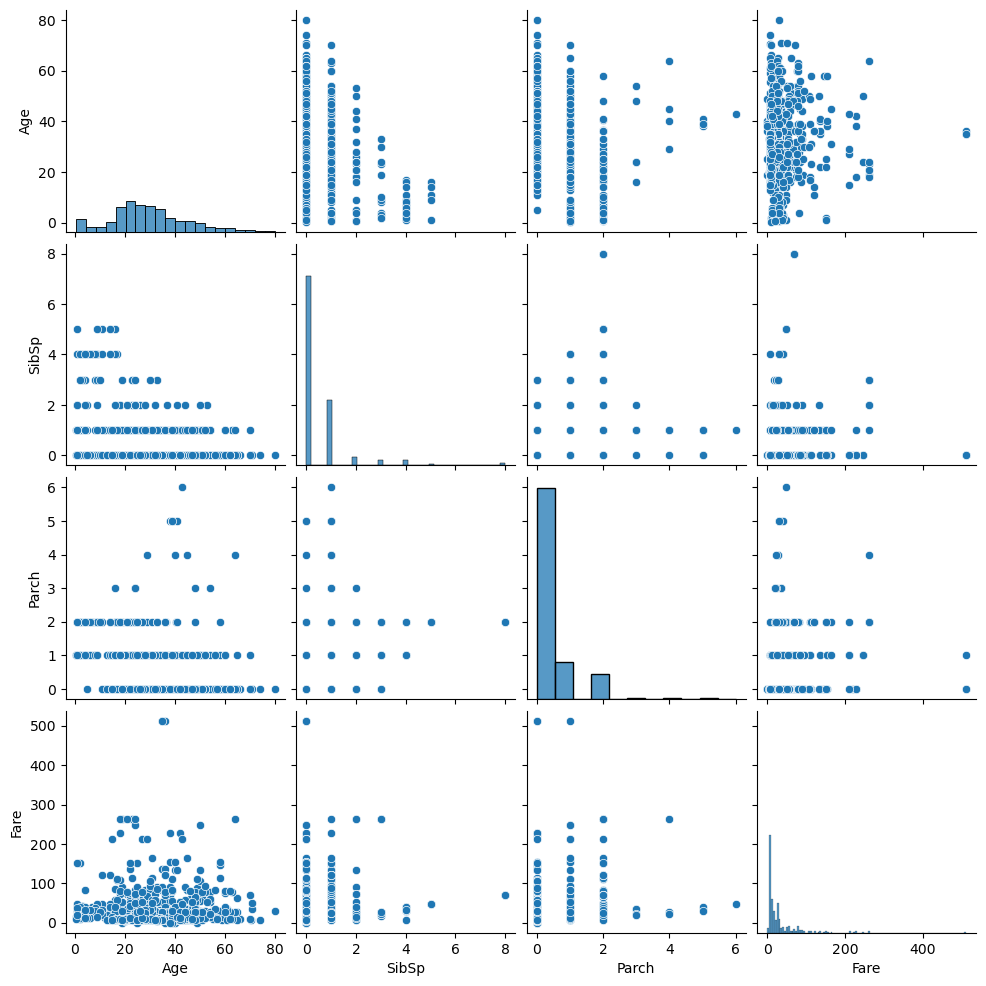

In [14]:
sns.pairplot(df[['Age','SibSp','Parch','Fare']])

In [15]:
X = df.iloc[:,1:]
X.shape

(891, 7)

In [16]:
y = df.iloc[:,:1]
y.shape

(891, 1)

In [17]:
X_train , X_test , y_train , y_test = train_test_split(X,y , random_state = 0 , test_size = 0.3)

In [18]:
transformer  = ColumnTransformer(transformers = [
    ('tf1' , SimpleImputer(), ['Age'] ),
    ('tf2' , OneHotEncoder(sparse = False , drop = 'first' , dtype = np.int32) , ['Sex' , 'Embarked'] )
] , remainder = 'passthrough')

In [19]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [20]:
X_train_transformed.shape , X_test_transformed.shape

((623, 9), (268, 9))

In [21]:
X_train_transformed = pd.DataFrame(X_train_transformed)
X_test_transformed = pd.DataFrame(X_test_transformed)

In [22]:
X_train_transformed.head()

,0,1,2,3,4,5,6,7,8
0,51.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,26.5500
1,49.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,76.7292
2,1.000000,1.0,0.0,1.0,0.0,3.0,5.0,2.0,46.9000
3,54.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,77.2875
4,29.915339,0.0,0.0,0.0,0.0,3.0,1.0,0.0,14.4583


<Axes: >

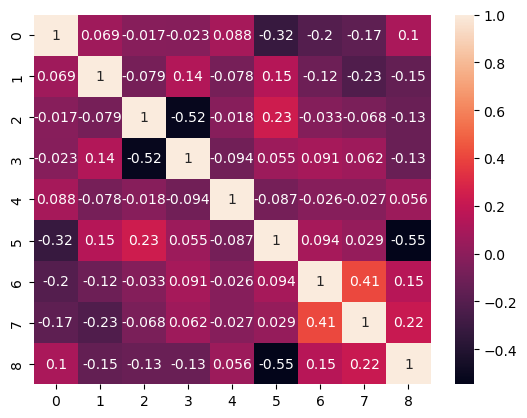

In [23]:
sns.heatmap(X_train_transformed.corr(), annot = True)

In [24]:
scaler = StandardScaler()

In [25]:
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)

In [26]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [27]:
np.round(X_train.describe() , 1)

,Pclass,Age,SibSp,Parch,Fare
count,623.0,502.0,623.0,623.0,623.0
mean,2.3,29.9,0.5,0.4,32.5
std,0.8,14.5,1.2,0.8,48.3
min,1.0,0.7,0.0,0.0,0.0
25%,1.5,21.0,0.0,0.0,7.9
50%,3.0,29.0,0.0,0.0,15.0
75%,3.0,38.0,1.0,0.0,31.4
max,3.0,80.0,8.0,6.0,512.3


In [28]:
np.round(X_train_scaled.describe() , 1)

,0,1,2,3,4,5,6,7,8
count,623.0,623.0,623.0,623.0,623.0,623.0,623.0,623.0,623.0
mean,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.2,-1.4,-0.3,-1.7,-0.1,-1.5,-0.5,-0.5,-0.7
25%,-0.5,-1.4,-0.3,-1.7,-0.1,-0.9,-0.5,-0.5,-0.5
50%,-0.0,0.7,-0.3,0.6,-0.1,0.8,-0.5,-0.5,-0.4
75%,0.5,0.7,-0.3,0.6,-0.1,0.8,0.4,-0.5,-0.0
max,3.8,0.7,3.2,0.6,17.6,0.8,6.4,6.7,10.0


In [29]:
model = LogisticRegression()

In [30]:
model.fit(X_train_scaled , y_train)

LogisticRegression()

In [31]:
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
print('Accuracy Score:' , accuracy_score(y_test , y_pred)*100)

Accuracy Score: 79.47761194029852


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

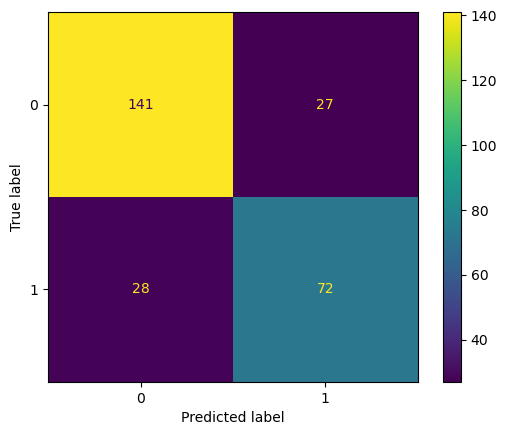

In [35]:
cm = confusion_matrix(y_test , y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
model2 = DecisionTreeClassifier()

In [ ]:
model2.fit(X_train_transformed , y_train)

In [ ]:
y_pred1 = model2.predict(X_test_transformed)
y_pred1

In [ ]:
print('Accuracy Score:' , accuracy_score(y_test , y_pred1)*100)